In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the adfuller module from statsmodels

from statsmodels.tsa.stattools import adfuller

# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Random Walk + White Noise

Since you have a time series as random walk, you can not use it in forecasting



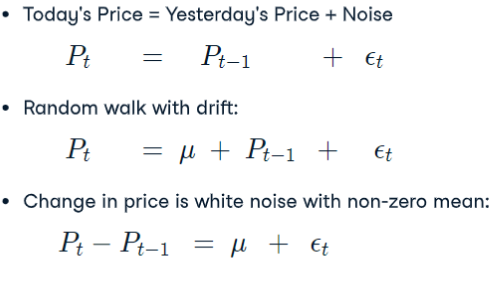

## Simulating a Random Walk Time Series

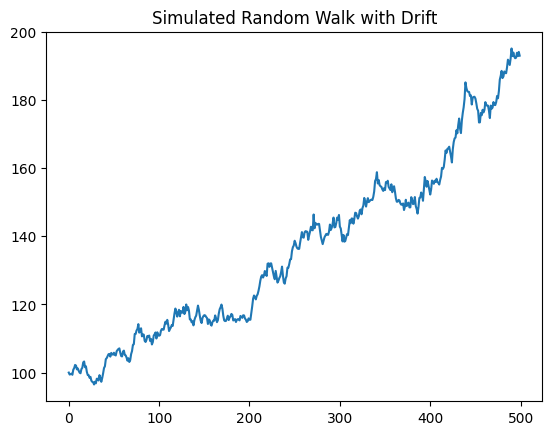

In [11]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

In [25]:
AMZN = pd.read_csv('./stocks_data/AMZN.csv',parse_dates=['Date'],index_col='Date')

### Prices

<AxesSubplot: xlabel='Date'>

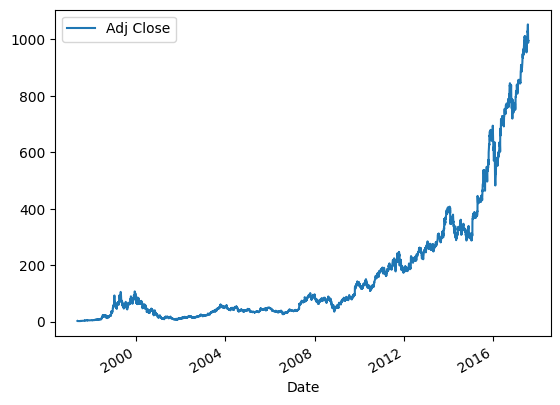

In [26]:
AMZN.plot()

In [23]:
# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.0251685257707335, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


**The p-value is high, so we need to accept Null Hypothesis, and the stocks prices are a Random Walk.**

### Pct_change

<AxesSubplot: xlabel='Date'>

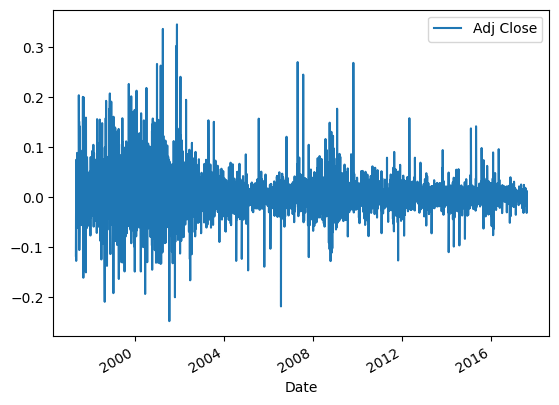

In [27]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

AMZN_ret.plot()

In [28]:
# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret)
print('The p-value of the test on pct_change is: ' + str(results[1]))

The p-value of the test on pct_change is: 2.5655898083469794e-22


**The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.**

# Stationarity

Ajustando a frequencia é possível transformar uma série em estacionária.

In [30]:
HRB = pd.read_csv('./stocks_data/AMZN.csv',parse_dates=['Date'],index_col='Date')

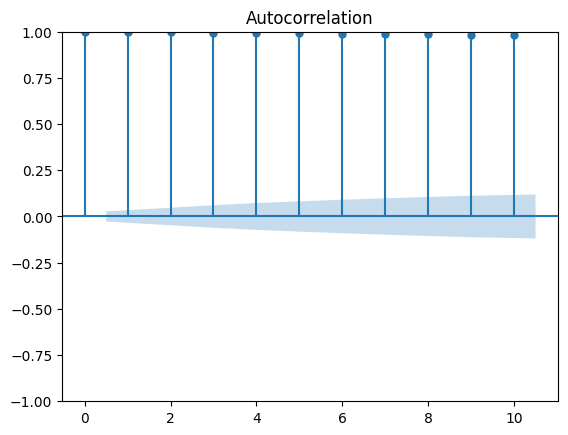

In [37]:
plot_acf(HRB,lags=10)
plt.show()

            Adj Close
Date                 
1997-05-15        NaN
1997-05-16        NaN
1997-05-19        NaN
1997-05-20        NaN
1997-05-21  -0.531250
1997-05-22  -0.333334
1997-05-23  -0.208333
1997-05-27  -0.052084
1997-05-28   0.104167
1997-05-29   0.109375


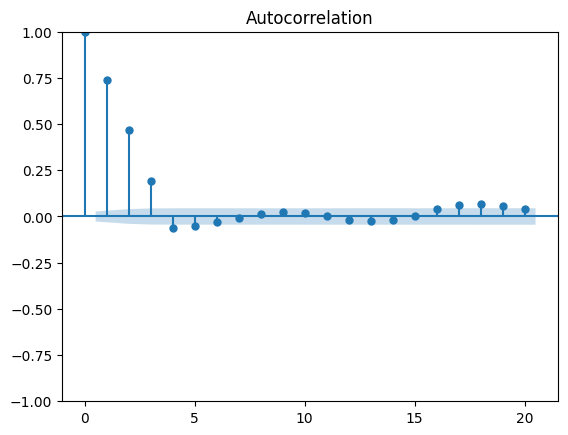

In [40]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa,lags=20)
plt.show()